In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import os

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("C:/Users/SAHIL/Downloads/train.csv")

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.shape

(1460, 81)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
sum(data.duplicated(subset ='Id'))==0 

True

In [13]:
round(100*(data.isnull().sum()/len(data.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [14]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [15]:




data.columns[data.isnull().any()]
null=data.isnull().sum()/len(data)*100
null=null[null>0]
null.sort_values(inplace=True ,ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [16]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]


Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    data[col]=data[col].fillna('None')

In [18]:
def getHighCategoricalValueCounts():
    column =[]
    categorical_columns =data.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(data[col].value_counts().max() >= 1241):
            column.append(col)
    return column 

columnsToBeRemoved = getHighCategoricalValueCounts()

data.drop(columnsToBeRemoved,axis=1,inplace =True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [19]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include= 'object').isnull().sum()>0]

Series([], dtype: int64)

In [20]:
data.select_dtypes(include=[ 'int64','float']).isnull().sum()[data.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [21]:
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan,data['MasVnrArea'].median())


In [22]:
data['GarageYrBlt']= data ['GarageYrBlt'].fillna(0)
data['GarageYrBlt']= data ['GarageYrBlt'].astype(int)


In [23]:
def checkForRemodel (row):
    if(row['YearBuilt']== row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt']< row['YearRemodAdd']):
        return 1
    else:
        return 2
    
data['IsRemodelled']= data.apply(checkForRemodel,axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [24]:
def getBuiltOrRemodelAge (row):
    if(row['YearBuilt']== row['YearRemodAdd']):
            return (row['YrSold']< row['YearBuilt'])

    else:
        return row ['YrSold']-row['YearRemodAdd']
    
    
data['getBuiltOrRemodelAge']= data.apply(getBuiltOrRemodelAge,axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,getBuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,False
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,False
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,False


In [25]:
def getGarageConstructionPeriod (row):
    if row ==0:
        return 0
    elif row>= 1900 and row < 2000:
        return 0
    else:
        return 1
    data['getGarageConstructionPeriod']=data ['GarageYrBuilt'].apply(getGarageConstructionPeriod)
    data.head()

In [26]:
data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)


In [27]:
def getHighNumericalValueCounts():
    column  =[]
    numerical_columns =data.select_dtypes(include=['int64','float'])
    for col in (numerical_columns):
        if(data[col].value_counts().max() >=1241):
            column.append(col)
        return column
    
columnsToBeRemoved = getHighNumericalValueCounts()
data.drop(columnsToBeRemoved,axis = 1,inplace =True)
data.drop(['MoSold'],axis =1 ,inplace =True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleCondition,SalePrice,IsRemodelled,getBuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,Normal,208500,0,False
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,Normal,181500,0,False
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,Normal,250000,0,False


In [28]:
percent_missing = round(100*(data.isnull().sum()/len(data.index)),2)
print(percent_missing)

Id                      0.0
MSSubClass              0.0
MSZoning                0.0
LotFrontage             0.0
LotArea                 0.0
LotShape                0.0
LotConfig               0.0
Neighborhood            0.0
BldgType                0.0
HouseStyle              0.0
OverallQual             0.0
OverallCond             0.0
RoofStyle               0.0
Exterior1st             0.0
Exterior2nd             0.0
MasVnrType              0.0
MasVnrArea              0.0
ExterQual               0.0
Foundation              0.0
BsmtQual                0.0
BsmtExposure            0.0
BsmtFinType1            0.0
BsmtFinSF1              0.0
BsmtFinSF2              0.0
BsmtUnfSF               0.0
TotalBsmtSF             0.0
HeatingQC               0.0
1stFlrSF                0.0
2ndFlrSF                0.0
LowQualFinSF            0.0
GrLivArea               0.0
BsmtFullBath            0.0
BsmtHalfBath            0.0
FullBath                0.0
HalfBath                0.0
BedroomAbvGr        

In [29]:
data[data.duplicated(keep =False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleCondition,SalePrice,IsRemodelled,getBuiltOrRemodelAge


In [30]:
data.describe (percentiles =[.25,.50,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,IsRemodelled
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,0.476712
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,0.499629
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,...,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,...,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,...,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,1.000000


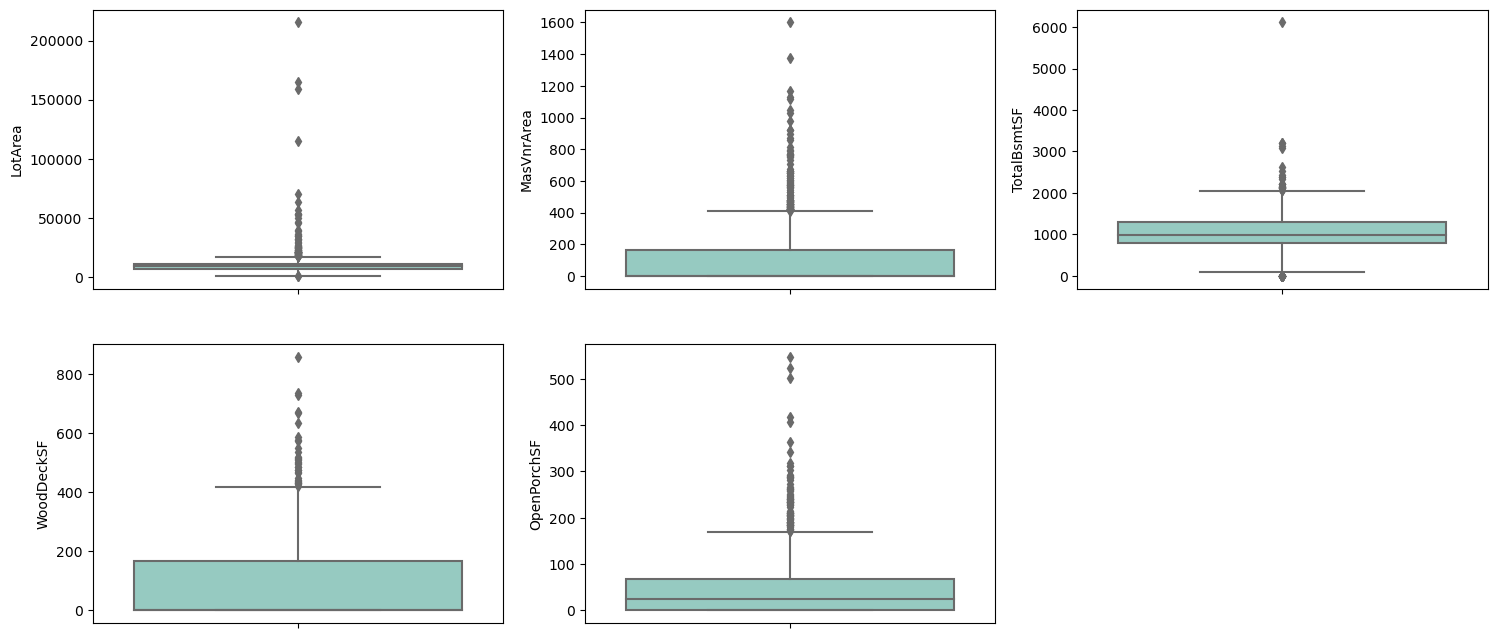

In [31]:
plt.figure(figsize =(18,21))
plt.subplot (5,3,1)
sns.boxplot(y='LotArea',palette ='Set3',data =data)
plt.subplot (5,3,2)
sns.boxplot(y='MasVnrArea',palette ='Set3',data =data)
plt.subplot (5,3,3)
sns.boxplot(y='TotalBsmtSF',palette ='Set3',data =data)
plt.subplot (5,3,4)
sns.boxplot(y='WoodDeckSF',palette ='Set3',data =data)
plt.subplot (5,3,5)
sns.boxplot(y='OpenPorchSF',palette ='Set3',data =data)
plt.show()

In [32]:
nn_quartile_LotArea =data['LotArea'].quantile(0.98)
data = data[data["LotArea"]< nn_quartile_LotArea]
nn_quartile_MasVnrArea =data['MasVnrArea'].quantile(0.98)
data = data[data["MasVnrArea"]< nn_quartile_MasVnrArea]
nn_quartile_TotalBsmtSF =data['TotalBsmtSF'].quantile(0.98)
data = data[data["TotalBsmtSF"]< nn_quartile_TotalBsmtSF]
nn_quartile_WoodDeckSF =data['WoodDeckSF'].quantile(0.98)
data = data[data["WoodDeckSF"]< nn_quartile_WoodDeckSF]
nn_quartile_OpenPorchSF =data['OpenPorchSF'].quantile(0.98)
data = data[data["OpenPorchSF"]< nn_quartile_OpenPorchSF]

In [33]:
num_data =round(100*(len(data)/1460),2)
print(num_data)

90.21


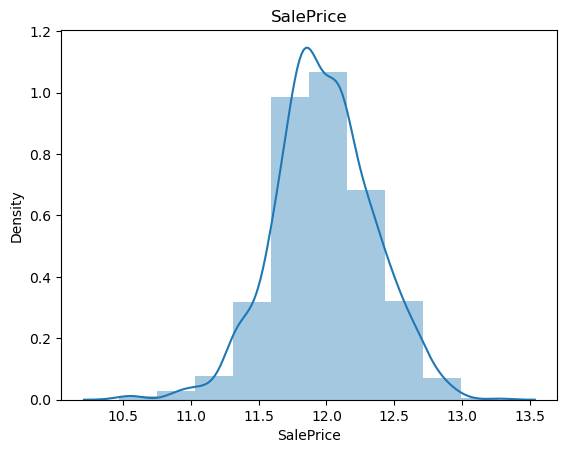

In [34]:
data['SalePrice'] = np.log1p(data['SalePrice'])

plt.title('SalePrice')
sns.distplot(data['SalePrice'],bins =10)
plt.show()

KeyError: "['BuiltOrRemodelAge'] not in index"

<Figure size 1000x500 with 0 Axes>

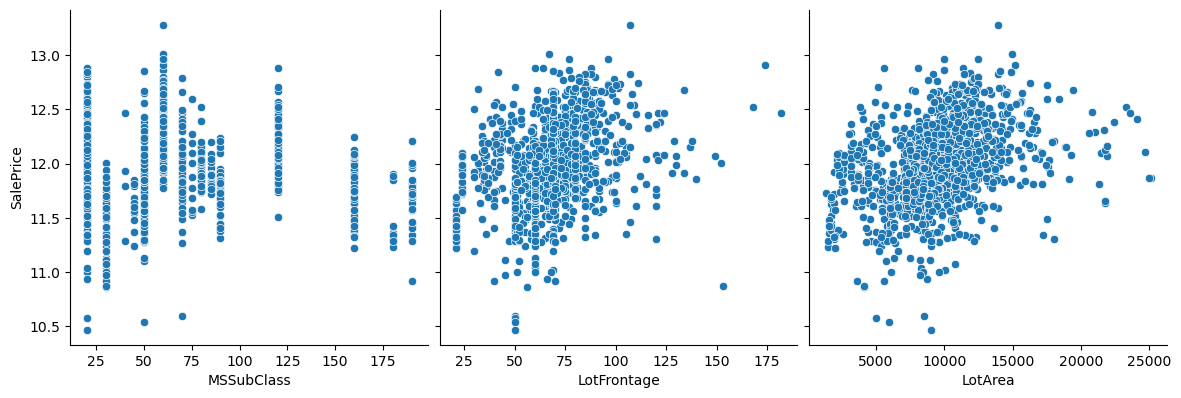

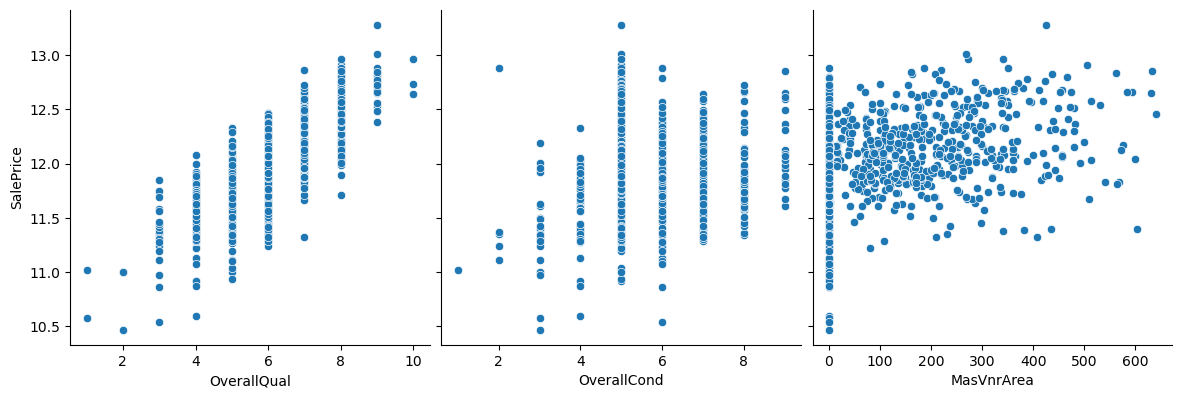

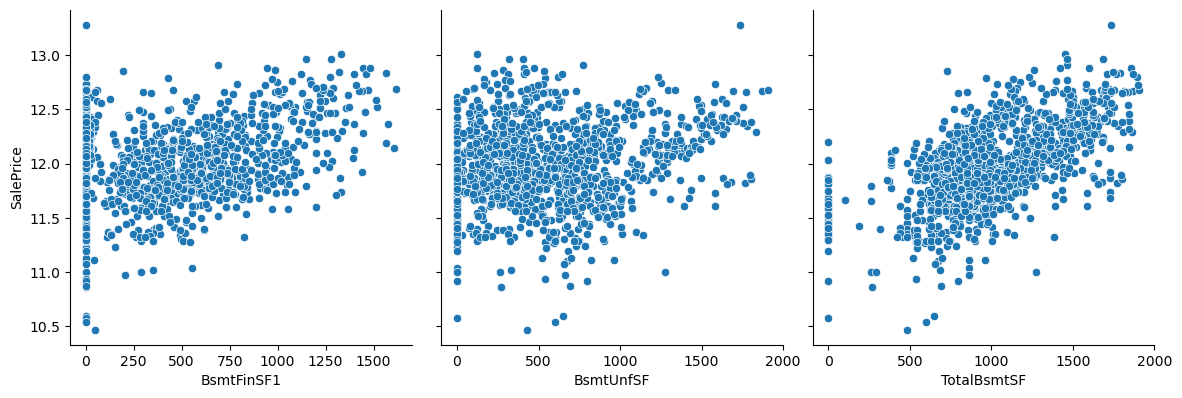

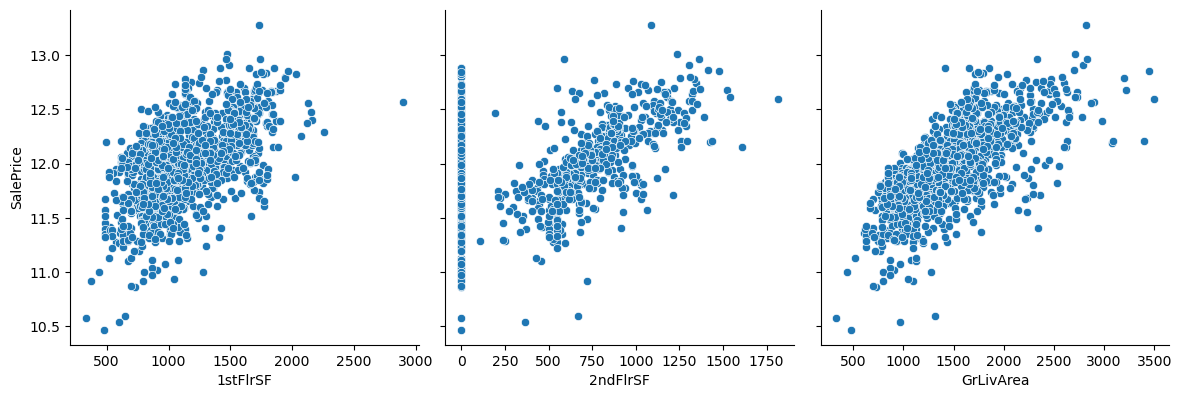

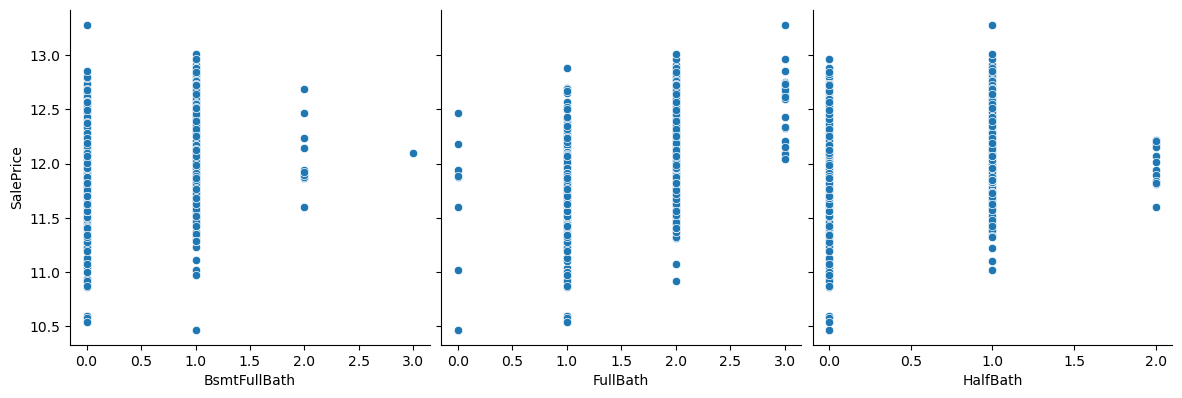

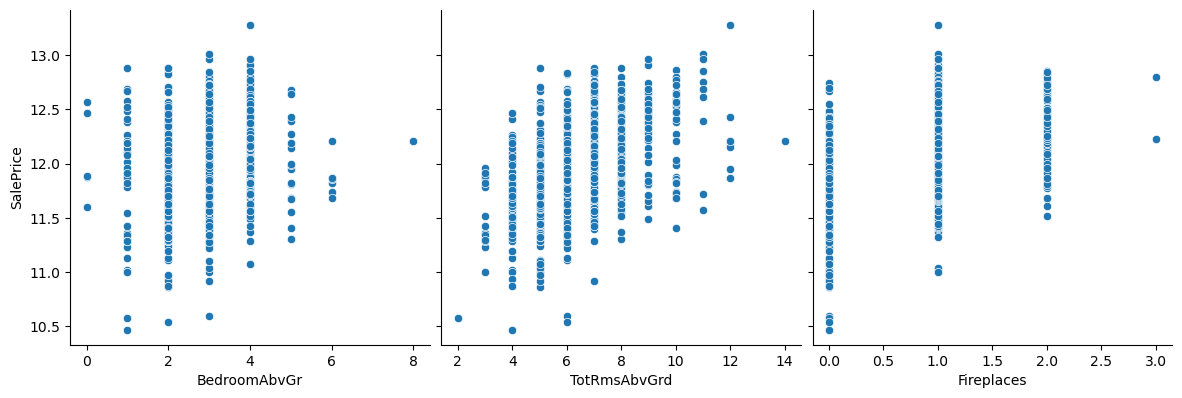

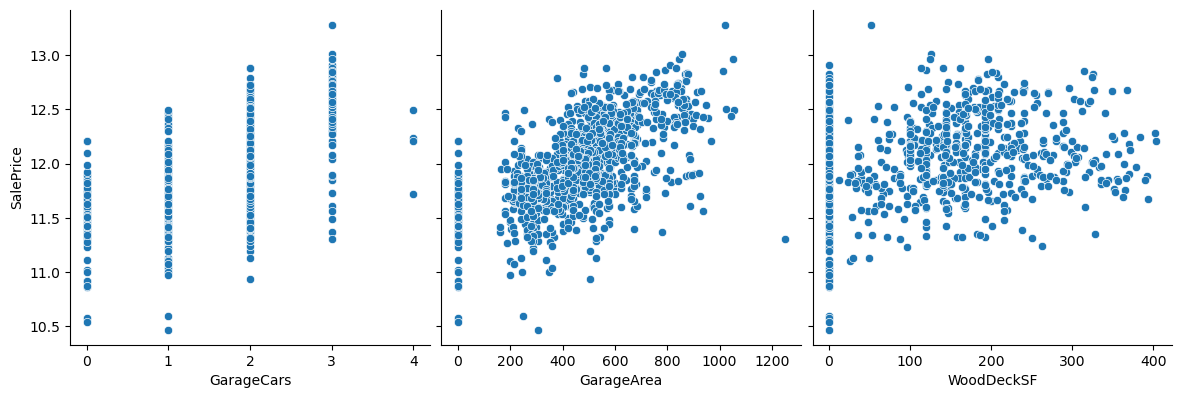

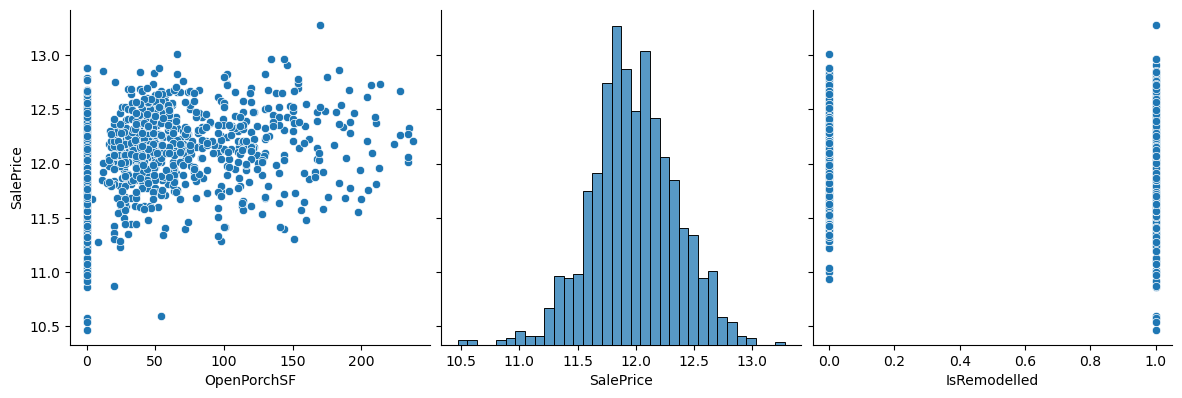

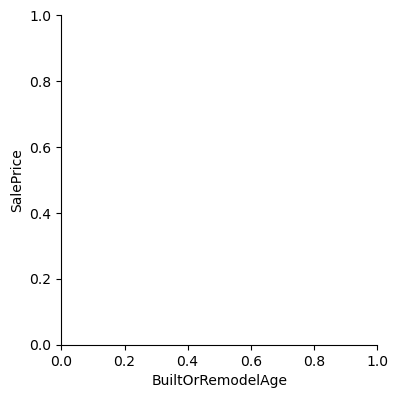

In [35]:
plt.figure(figsize=(10,5))
sns.pairplot(data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [ ]:
plt.figure(figsize= (20,10))
sns.heatmap(data.corr(),annot =True,cmap ="Greens")
plt.show()

In [ ]:
data.shape

In [ ]:
data.drop(['TotRmsAbvGrd','GarageArea'],axis=1 ,inplace =True)

In [ ]:

data.shape

In [36]:
data['d_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['d_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['d_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['d_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
data['d_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data['d_BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
data['d_HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data['d_Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
data['d_LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
data['d_MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data['d_SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [37]:
data = data.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [38]:
d_MSZoning = pd.get_dummies(data['MSZoning'], prefix='MSZoning', drop_first = True)
data = pd.concat([data, d_MSZoning], axis = 1)
d_Neighborhood = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first = True)
data = pd.concat([data, d_Neighborhood], axis = 1)
d_RoofStyle = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle', drop_first = True)
data = pd.concat([data, d_RoofStyle], axis = 1)
d_Exterior1st = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st', drop_first = True)
data = pd.concat([data, d_Exterior1st], axis = 1)
d_Exterior2nd = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data = pd.concat([data, d_Exterior2nd], axis = 1)
d_Foundation = pd.get_dummies(data['Foundation'], prefix='Foundation', drop_first = True)
data = pd.concat([data, d_Foundation], axis = 1)
d_GarageType = pd.get_dummies(data['GarageType'], prefix='GarageType', drop_first = True)
data = pd.concat([data, d_GarageType], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [39]:
data = data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,0,0,0,1,0,0,0,0,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Columns: 122 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(45), object(1), uint8(73)
memory usage: 608.3+ KB


In [41]:
X=data.drop(['SalePrice'],axis =1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,0,0,0,1,0,0,0,0,0


In [42]:
y= data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [43]:
from sklearn.preprocessing import scale

cols = X.columns
X=pd.DataFrame (scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=121)

In [44]:




np.random.seed(0)
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size =0.7,test_size =0.3)

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


lm = LinearRegression()
lm.fit(X_train, y_train)
num_features_to_select = 50

rfe = RFE(lm)
X_train_rfe = rfe.fit_transform(X_train, y_train)

rfe.n_features_to_select = num_features_to_select

X_train_selected = rfe.transform(X_train)


In [46]:
col =X_train.columns[rfe.support_]
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtFinSF2,True,1
6,BsmtUnfSF,True,1
7,TotalBsmtSF,True,1
8,1stFlrSF,True,1
9,2ndFlrSF,True,1


In [47]:
X_train_rfe = X_train[col]

In [48]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [49]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()


folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.076213,-0.082466,1
1,0.001,-0.076213,-0.082466,2
2,0.01,-0.076214,-0.082466,3
3,0.1,-0.076225,-0.082470,4
4,0.2,-0.076238,-0.082474,5
5,0.3,-0.076249,-0.082477,6
6,0.4,-0.076262,-0.082481,7
7,0.5,-0.076274,-0.082485,8
8,0.6,-0.076286,-0.082489,9
9,0.7,-0.076298,-0.082492,10


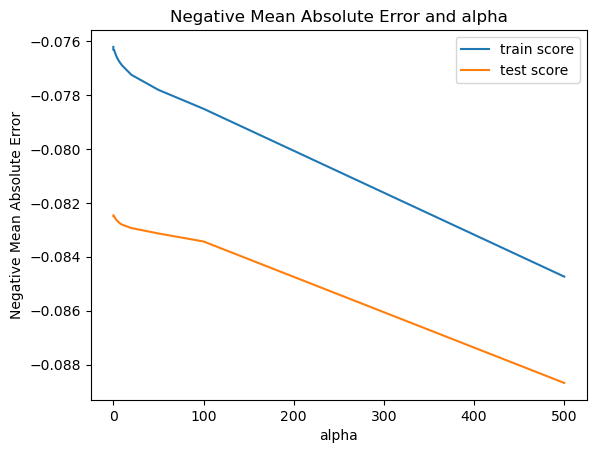

In [51]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [52]:
ridge_model_cv.best_estimator_

Ridge(alpha=0.0001)

In [53]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.67555306e-02,  1.81120585e-02,  7.04093033e-02,  4.43009098e-02,
        2.43657493e-02,  4.31624006e-03,  5.12751759e-03,  3.43750079e-02,
        4.40549285e-02,  3.21598440e-02, -4.09379779e-03,  6.08091603e-02,
        9.49448322e-03,  1.81492588e-02,  2.00606558e-02,  1.80231904e-02,
        1.80618071e-02,  1.06235589e-02,  9.07050121e-03, -1.79170921e-02,
        1.69126201e-02,  9.30266856e-03,  1.44676092e-02,  1.96307082e-02,
        1.52090424e-02,  1.72366052e-02,  1.05410720e-02,  1.15357956e-02,
        1.75535954e-02,  6.26465025e-02,  2.61632957e-02,  9.31696682e-02,
        7.47381132e-02, -1.00290007e-02,  2.07941897e-02, -1.70217141e-02,
       -1.83075105e-02, -1.54309711e-02, -1.04989257e-02, -1.15421882e-02,
        1.44189008e-02, -2.47698757e-02, -1.06411717e-02,  1.32454918e-02,
       -9.56441802e-03, -1.25156774e-03, -1.59416970e-02, -2.73568870e-02,
       -1.25156774e-03,  2.51610366e-03,  2.38012708e-02, -5.85496225e-31,
        1.69089810e-02,  

In [54]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0168
1,LotArea,0.0181
2,OverallQual,0.0704
3,OverallCond,0.0443
4,BsmtFinSF1,0.0244
5,BsmtFinSF2,0.0043
6,BsmtUnfSF,0.0051
7,TotalBsmtSF,0.0344
8,1stFlrSF,0.0441
9,2ndFlrSF,0.0322


In [55]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0168,
 'LotArea': 0.0181,
 'OverallQual': 0.0704,
 'OverallCond': 0.0443,
 'BsmtFinSF1': 0.0244,
 'BsmtFinSF2': 0.0043,
 'BsmtUnfSF': 0.0051,
 'TotalBsmtSF': 0.0344,
 '1stFlrSF': 0.0441,
 '2ndFlrSF': 0.0322,
 'LowQualFinSF': -0.0041,
 'GrLivArea': 0.0608,
 'BsmtFullBath': 0.0095,
 'FullBath': 0.0181,
 'HalfBath': 0.0201,
 'GarageCars': 0.018,
 'GarageArea': 0.0181,
 'WoodDeckSF': 0.0106,
 'ScreenPorch': 0.0091,
 'getBuiltOrRemodelAge': -0.0179,
 'd_BsmtQual': 0.0169,
 'd_BsmtExposure': 0.0093,
 'd_BsmtFinType1': 0.0145,
 'd_HeatingQC': 0.0196,
 'd_KitchenQual': 0.0152,
 'd_FireplaceQu': 0.0172,
 'd_GarageFinish': 0.0105,
 'd_HouseStyle': 0.0115,
 'd_SaleCondition': 0.0176,
 'MSZoning_FV': 0.0626,
 'MSZoning_RH': 0.0262,
 'MSZoning_RL': 0.0932,
 'MSZoning_RM': 0.0747,
 'Neighborhood_BrDale': -0.01,
 'Neighborhood_Crawfor': 0.0208,
 'Neighborhood_Edwards': -0.017,
 'Neighborhood_IDOTRR': -0.0183,
 'Neighborhood_MeadowV': -0.0154,
 'Neighborhood_NAmes': -0.0105,
 'Neighb

In [56]:
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [57]:
def find(x):
    return ridge_coeff_dict[x]

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
19,MSZoning_RM,True,1,0.0747
1,OverallQual,True,1,0.0704
9,GrLivArea,True,1,0.0608
2,OverallCond,True,1,0.0443
6,1stFlrSF,True,1,0.0441
5,TotalBsmtSF,True,1,0.0344
7,2ndFlrSF,True,1,0.0322
3,BsmtFinSF1,True,1,0.0244
31,Exterior2nd_MetalSd,True,1,0.0238
12,HalfBath,True,1,0.0201


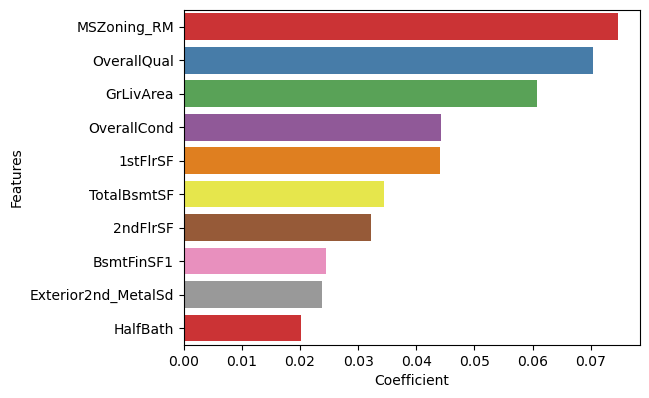

In [58]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [59]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)




Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])



,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.076268,-0.082520,1
1,0.0002,-0.076346,-0.082606,2
2,0.0003,-0.076458,-0.082737,3
3,0.0004,-0.076585,-0.082877,4
4,0.0005,-0.076725,-0.083015,5
5,0.001,-0.077488,-0.083633,6
6,0.002,-0.078845,-0.084426,7
7,0.003,-0.079441,-0.084954,8
8,0.004,-0.080176,-0.085745,9
9,0.005,-0.081000,-0.086613,10


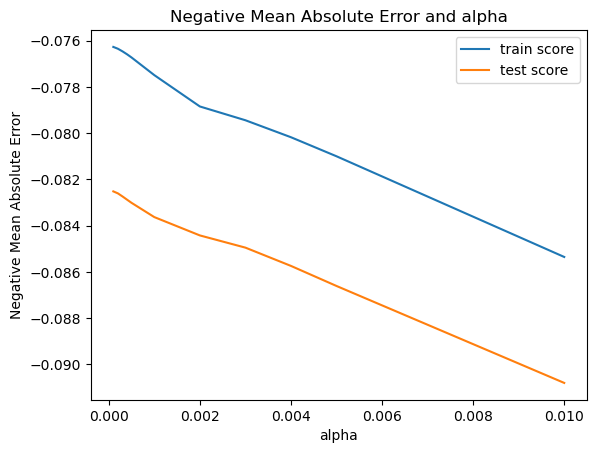

In [61]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [62]:
lasso_model_cv.best_estimator_


Lasso(alpha=0.0001)

In [63]:
alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01603465,  0.01798378,  0.07086707,  0.04399864,  0.01968306,
        0.00228435, -0.        ,  0.03748077,  0.01762499,  0.        ,
       -0.00771949,  0.09866228,  0.00953467,  0.01599355,  0.01791505,
        0.019614  ,  0.01892739,  0.01019835,  0.00878217, -0.01726522,
        0.01769693,  0.00972059,  0.01389653,  0.01946592,  0.01488483,
        0.01674301,  0.01190296,  0.00978687,  0.01688273,  0.08784867,
        0.03837513,  0.14314965,  0.11515324, -0.00839577,  0.02067447,
       -0.01682727, -0.01386005, -0.01358233, -0.00967838, -0.01060949,
        0.01384069, -0.02312253, -0.00982014,  0.01293448, -0.00939218,
       -0.00238451, -0.00831489, -0.02642168, -0.00015311,  0.00169348,
        0.0162089 , -0.        ,  0.01570518,  0.01511426,  0.03793538,
        0.01571891,  0.00757977,  0.01290243,  0.0087637 ,  0.00616791])

In [64]:
mean_squared_error(y_test, lasso.predict(X_test))


0.011153731224074048

In [66]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0160
1,LotArea,0.0180
2,OverallQual,0.0709
3,OverallCond,0.0440
4,BsmtFinSF1,0.0197
5,BsmtFinSF2,0.0023
6,TotalBsmtSF,0.0375
7,1stFlrSF,0.0176
8,LowQualFinSF,-0.0077
9,GrLivArea,0.0987


In [67]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.016034649687590472,
 'LotArea': 0.017983780062354526,
 'OverallQual': 0.07086707411574679,
 'OverallCond': 0.04399863758012144,
 'BsmtFinSF1': 0.01968305767785298,
 'BsmtFinSF2': 0.0022843547030460976,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.037480770342704244,
 '1stFlrSF': 0.017624992831718506,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': -0.007719491796566433,
 'GrLivArea': 0.09866228241649709,
 'BsmtFullBath': 0.009534668001110014,
 'FullBath': 0.01599355288653607,
 'HalfBath': 0.017915047319312132,
 'GarageCars': 0.019614000824802667,
 'GarageArea': 0.018927392386875366,
 'WoodDeckSF': 0.010198350420321401,
 'ScreenPorch': 0.008782167998365818,
 'getBuiltOrRemodelAge': -0.017265222193986032,
 'd_BsmtQual': 0.017696927453618238,
 'd_BsmtExposure': 0.009720587894042152,
 'd_BsmtFinType1': 0.013896530535439992,
 'd_HeatingQC': 0.019465924907436132,
 'd_KitchenQual': 0.014884831369670944,
 'd_FireplaceQu': 0.01674301417735799,
 'd_GarageFinish': 0.011902955426559371,
 'd_HouseSty

In [68]:
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [70]:
def find(x):
    return lasso_coeff_dict[x]
temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
7,GrLivArea,True,1,0.098662
1,OverallQual,True,1,0.070867
2,OverallCond,True,1,0.043999
18,MSZoning_RH,True,1,0.038375
32,Foundation_PConc,True,1,0.037935
4,TotalBsmtSF,True,1,0.037481
19,Neighborhood_Crawfor,True,1,0.020674
3,BsmtFinSF1,True,1,0.019683
11,GarageCars,True,1,0.019614
12,GarageArea,True,1,0.018927


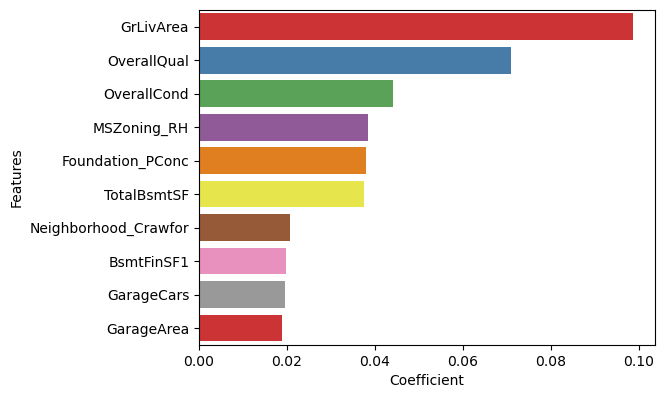

In [71]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()